In [69]:
from code_base import load_data, jacobi, summary_stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os.path import join
from time import perf_counter as time
import random

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label('Temperature')

In [70]:
LOAD_DIR= '/../../dtu/projects/02613_2025/data/modified_swiss_dwellings/'
with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
    building_ids=f.read().splitlines()

In [71]:
#Take a partition of floorplans
random.seed(10)

N = 2
building_ids = random.sample(building_ids, N)

 #Loadfloorplans
all_u0=np.empty((N, 514,514))
all_interior_mask=np.empty((N,512,512),dtype='bool')
for i,bid in enumerate(building_ids):
    u0,interior_mask =load_data(LOAD_DIR,bid)
    all_u0[i]=u0
    all_interior_mask[i]=interior_mask

In [72]:
#Simulation 
#Run jacobi iterations for each floorplan
MAX_ITER=20_000
ABS_TOL=1e-4 

exec_times = []
all_u=np.empty_like(all_u0)


for i, (u0,interior_mask) in enumerate(zip(all_u0,all_interior_mask)):   
    t=time()
    u=jacobi(u0,interior_mask,MAX_ITER,ABS_TOL)
    t=time()-t 

    all_u[i]=u
    exec_times.append(t)

    

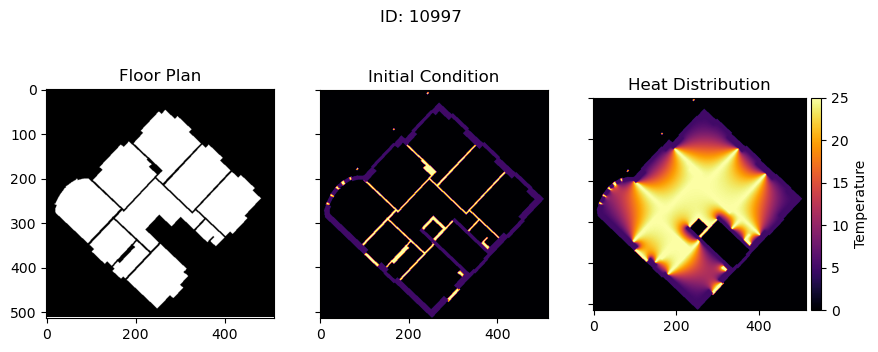

In [ ]:
def visualise_simulation(building_id):
    idx = building_ids.index(building_id)
    
    fig, axes = plt.subplots(1,3, figsize = (10,4), sharey=True)
    axes[0].imshow(all_interior_mask[idx], cmap='grey')
    axes[1].imshow(all_u0[idx], cmap='magma')
    im = axes[2].imshow(all_u[idx], cmap='magma')
    
    axes[0].set(title='Floor Plan')
    axes[1].set(title='Initial Condition')
    axes[2].set(title='Heat Distribution')
    add_colorbar(im, fig, axes[2])
    fig.suptitle(f'ID: {building_id}')    

visualise_simulation(building_ids[1])

In [ ]:
LOAD_DIR= '/../../dtu/projects/02613_2025/data/modified_swiss_dwellings/'
with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
    building_ids=f.read().splitlines()

with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
    building_ids=f.read().splitlines()
if len(sys.argv)<2:
    N=1
else:
    N=int(sys.argv[1])

#Take a partition of floorplans, chose to select N random floor plans
random.seed(10)

building_ids = random.sample(building_ids, N)

 #Loadfloorplans
all_u0=np.empty((N, 514,514))
all_interior_mask=np.empty((N,512,512),dtype='bool')
for i,bid in enumerate(building_ids):
    u0,interior_mask =load_data(LOAD_DIR,bid)
    all_u0[i]=u0
    all_interior_mask[i]=interior_mask

#Simulation 
#Run jacobi iterations for each floorplan
MAX_ITER=20_000
ABS_TOL=1e-4 

exec_times = []
all_u=np.empty_like(all_u0)

for i, (u0,interior_mask) in enumerate(zip(all_u0,all_interior_mask)):   
    t=time()
    u=jacobi(u0,interior_mask,MAX_ITER,ABS_TOL)
    t=time()-t 

    all_u[i]=u
    exec_times.append(t)

print(exec_times)

#PrintsummarystatisticsinCSVformat
stat_keys=['mean_temp', 'std_temp','pct_above_18', 'pct_below_15']
print('building_id, '+','.join(stat_keys)) #CSVheader
for bid,u, interior_mask in zip(building_ids,all_u, all_interior_mask):
    stats=summary_stats(u,interior_mask)
    print(f"{bid},",",".join(str(stats[k]) for k in stat_keys))
